----------------
## **Objective:**
----------------
This notebook is to visualize the idea of elbow method using k-means clustering and help undertand the idea better.

**Ref: Elbow method (clustering)**
https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
mean_params = [0.5, 1, 2, 3, 4]
list_distances = []
for mean_param in mean_params:
    # Generate test data
    X1 = np.random.multivariate_normal(mean=np.array([mean_param, 0.0]), cov=np.identity(2), size=100)
    X2 = np.random.multivariate_normal(mean=np.array([0.0, mean_param]), cov=np.identity(2), size=100)
    X3 = np.random.multivariate_normal(mean=np.array([0.0, mean_param]), cov=np.identity(2), size=100)
    X = np.concatenate([X1, X2, X3])
    np.random.shuffle(X)

    # Specify the range of the number of clusters
    number_of_clusters = range(1,10)

    # List to store the sum of distances from each data point to the cluster center
    list_distance  = []

    # Perform clustering with the specified number of clusters
    for k in number_of_clusters:
        model = KMeans(n_clusters=k).fit(X)
        cluster_center = model.cluster_centers_ # Coordinates of the cluster centers
        Y = model.predict(X) # Labels of the clusters each data point belongs to

        # Calculate the distance from each data point to the cluster center
        distance = 0
        for i in range(len(X)):
            data_point = X[i] # Coordinates of the 'i'th data point
            closest_center = cluster_center[Y[i]] # Coordinates of the cluster center the 'i'th data point belongs to

            # Calculate the Euclidean distance and divide  it by the total number of data points
            distance += (np.sqrt(np.sum((data_point - closest_center) ** 2))) / X.shape[0]

        # Add the calculated result to the list
        list_distance.append(distance)
    list_distances.append(list_distance)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

0 0.5
1 1
2 2
3 3
4 4


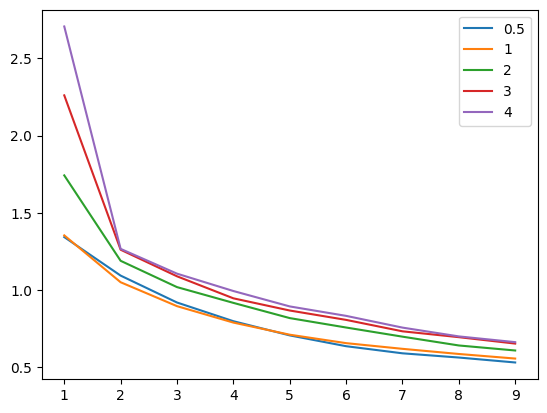

In [ ]:
# Visualization of the above
for idx, mean_param in enumerate(mean_params):
    print(idx, mean_param)
    plt.plot(number_of_clusters, list_distances[idx], label=str(mean_param))
plt.legend()
plt.show()

#### Observations:
・When clusters are separated by low-density regions, and the value of k is less than the actual number of clusters, points will be assigned across low-density regions, resulting in very large distances. When k matches the actual number of clusters, the sum of distances doesn't decrease significantly, making it clear that the k is the optimal number of clusters.

・When the distibution of test data becomes like Gaussian, the low-density regions between clusters disappear, making the "elbow" in the elbow method vanish.